# Trabalho Prático Interpretabilidade e Causalidade - Rafael Antunes (a55336)

#### Imports

In [1]:
from model_framework import importar_modelo, mostrar_classes, testar_modelo
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

## Importação do Modelo e Teste Normal

Modelo encontrado!


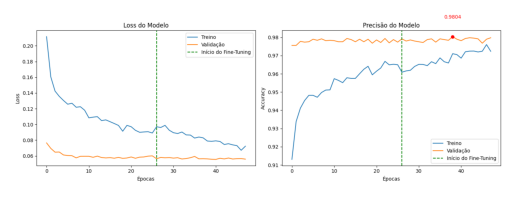

ValueError: Input 0 of layer "stem_conv" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 129, 129, 1)

In [2]:
train_ds, val_ds, modelo = importar_modelo()

In [ ]:
mostrar_classes(train_ds)
testar_modelo(modelo, 5)

In [ ]:
def compute_saliency(model, img_array):
    # Preprocessar EXATAMENTE como na predição
    img_proc = preprocess_input(img_array.copy())
    img_proc = img_proc[None, ...]  # adicionar batch size
    
    img_tensor = tf.convert_to_tensor(img_proc, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)

        preds = model(img_tensor)

        # Como seu modelo é binário (1 output sigmoid)
        class_score = preds[:, 0]

    grads = tape.gradient(class_score, img_tensor)[0]

    saliency = tf.math.abs(grads)

    # normalizar para 0..1
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))

    return saliency.numpy()

img = tf.keras.utils.load_img("./teste/teste_cao.png", target_size=(128, 128))
img_array = tf.keras.utils.img_to_array(img)

sal = compute_saliency(modelo, img_array)
plt.imshow(sal, cmap="hot")
plt.show()

